In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats

#Modeling
from scipy.stats import zscore, norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
# Reading the data as dataframe and print the first five rows
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank.shape

(5000, 14)

In [4]:
# Get info of the dataframe columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Insight:
bank dataset has 5000 rows and 14 columns, with no missing values.

In [5]:
# Check if any missing value
bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [6]:
# Experience can't have negative values hence replacing it with median
bank[bank['Experience'] == -1]['Experience'].count()

33

In [7]:
bank[bank['Experience'] == -2]['Experience'].count() 

15

In [8]:
bank[bank['Experience'] == -3]['Experience'].count() 

4

In [9]:
bank['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
bank['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
bank['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [10]:
bank['Experience'].isnull().sum()

52

Insights: Remove 52 negative values in the Experience column

In [11]:
bank['Experience'].fillna(bank['Experience'].median(),inplace=True)

In [12]:
# Five point summary of numerical attributes
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Insights:

Customer ID: categorical, qualitative, nominal variable with lowest id is 1 and highest value of id is 5000.

Age: numerical, quantitative, ratio which is normally distributed has a range of Q1 to Q3 between 35 to 55 while minimal age in the dataset is 23 and maximum is 67.

Experience: numerical (continuous), quantitative, interval with the range of Q1 to Q3 between 11 and 30. Due to errors or negative values in the data, I imputed those to mean/median values and the minimal/no experience is 0 to the maximum experience of 43.

Income: numerical (continuous), quantitative, interval (an income of 0 means no income) has a range of Q1 to Q3 between 39 and 98 while minimal income in the dataset is 8,000 dollars and the maximum income is 224,000 dollars.

ZIP Code: categorical, qualitative, nominal.

Family: categorical, qualitative, ordinal has a range of Q1 to Q3 between 1 and 3 while the lowest family size is 1 and maximum is 4.

CCAvg: numerical (continuous), quantitative, interval has a range of Q1 to Q3 between 0.70 and 2.50 while minimal average spending on credit cards per month is zero dollars and maximum is 10,000 dollars.

Education: categorical, qualitative, ordinal.. 1) Undergrad; 2) Graduate; 3) Advanced/Professional.

Mortgage: numerical (continuous), quantitative, interval has a range of Q1 to Q3 between zero dollars and 101,000 dollars while minimal mortage value in the dataset is zero dollars the maximum value is 635,000 dollars which means its highly skewed to the right.

Personal Loan: categorical (binary), qualitative, nominal. If the customer accepted the personal loan offered in the last campaign then 1 else 0.

Securities Account: categorical (binary), qualitative, nominal. If the customer has a securities account with the bank then 1 or 0.

CD Account: categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account with the bank then 1 or 0.

Online: categorical (binary), qualitative, nominal. If the customer uses internet banking facilities then 1 or 0.

CreditCard: categorical (binary), qualitative, nominal. If the customer use a credit card issued by the bank then 1 or 0.


In [13]:
# Number of unique values in a column
bank.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Insights:

Education is categorical with three unique values 

ID column has all unique values one for each row and will not provide any info to the algorithm

In [14]:
display(bank['Personal Loan'].value_counts(), bank['Personal Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal Loan, dtype: int64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

Insights: Out of the 5,000 customers, only 480 accepted the personal loan (9.60%)

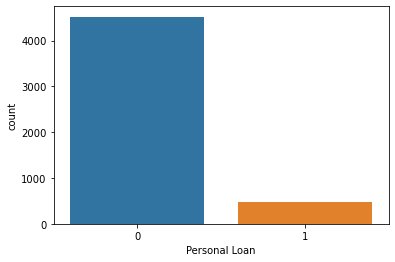

In [15]:
sns.countplot(bank["Personal Loan"])

Text(0.5, 1.0, 'Distribution of Mortgage, Customer: No to Personal Loan')

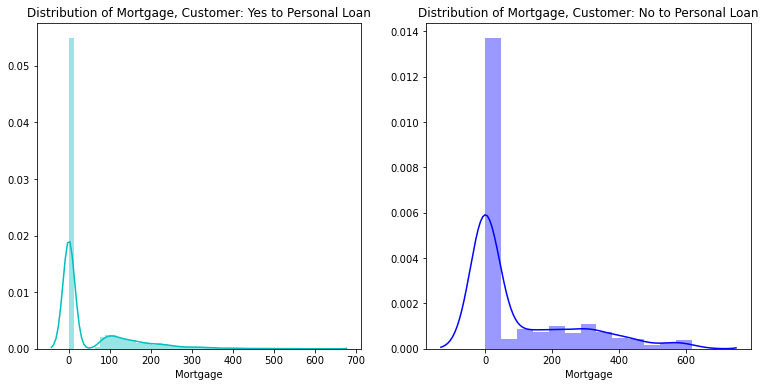

In [16]:
# Distribution of Mortgage
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage, Customer: Yes to Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage, Customer: No to Personal Loan')

Text(0.5, 1.0, 'Distribution of CCAvg, Customer: No to Personal Loan')

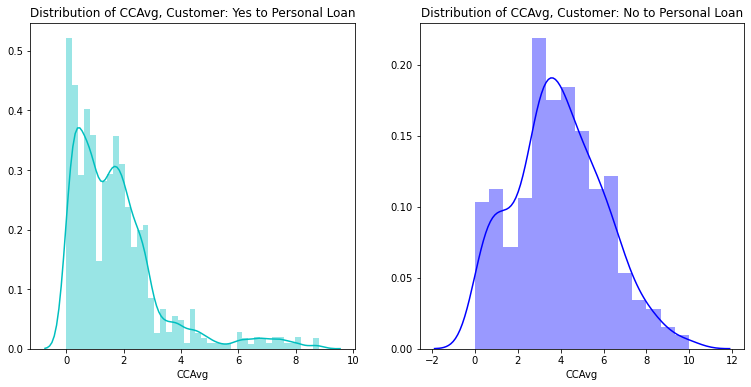

In [17]:
# Distribution of CCAvg
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['CCAvg'], color = 'c', 
             ax = ax).set_title('Distribution of CCAvg, Customer: Yes to Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['CCAvg'], color = 'b', 
             ax = ax).set_title('Distribution of CCAvg, Customer: No to Personal Loan')

Text(0.5, 1.0, 'Distribution of Income, Customer: No to Personal Loan')

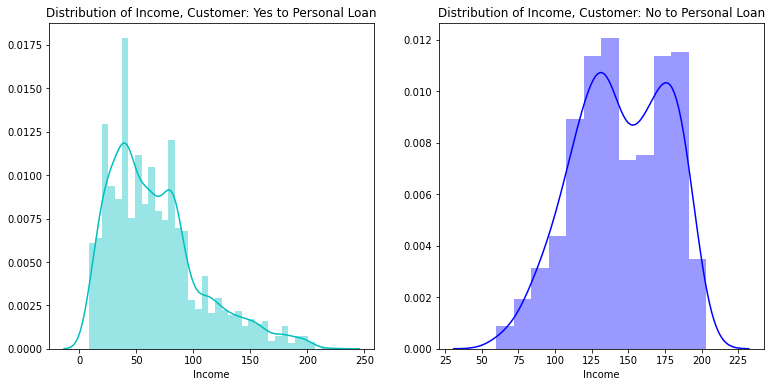

In [18]:
# Distribution of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Distribution of Income, Customer: Yes to Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Distribution of Income, Customer: No to Personal Loan')

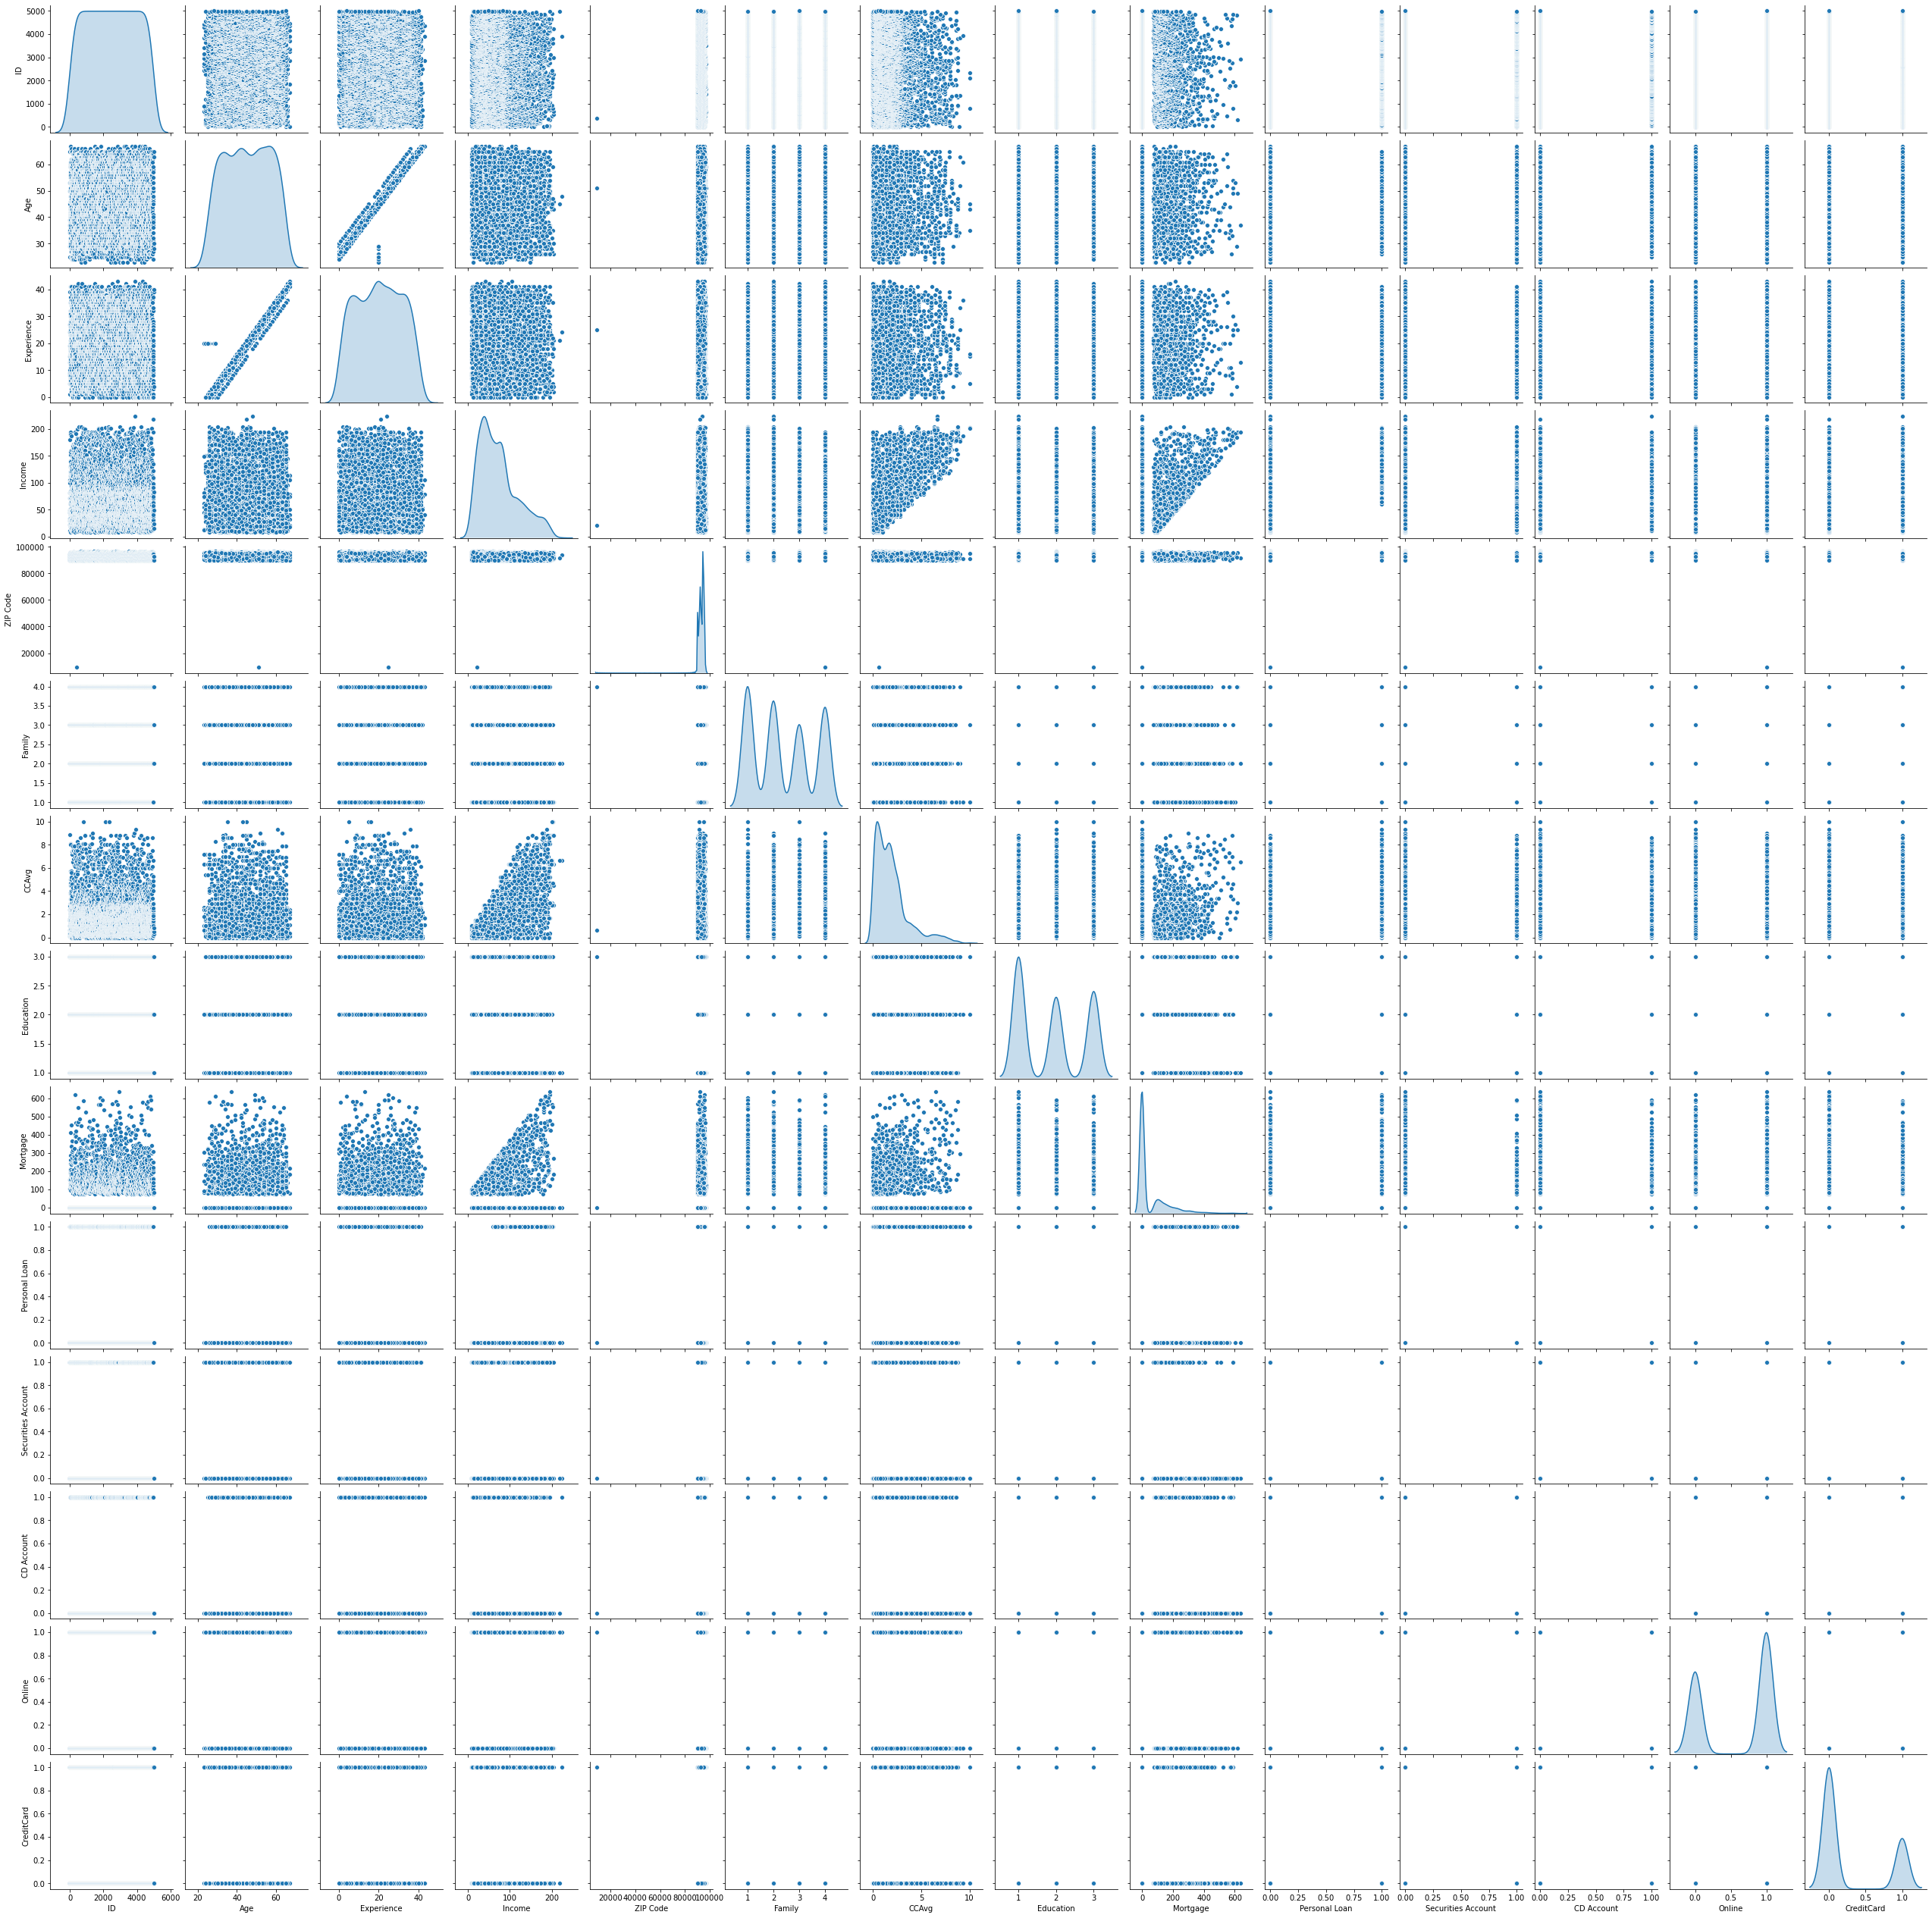

In [19]:
sns.pairplot(data =bank,diag_kind ='kde')

Insights: 

Income: We can clearly see data is highly right skewed

Morgage: We can clearly see data is highly right skewed

Family size plays an important role for customers considering taking personal loan from the bank as well as Mortgage and Education.


In [20]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Insights: 

Age and Experience: have strong positive correlation

Text(0.5, 1.0, 'Income by Personal Loan')

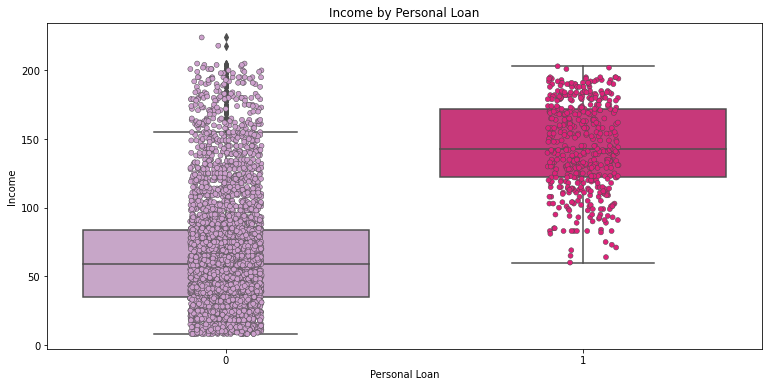

In [21]:
# Income by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'PuRd', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'PuRd', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Income by Personal Loan')

Text(0.5, 1.0, 'Average Spending on Credit Card by Personal Loan')

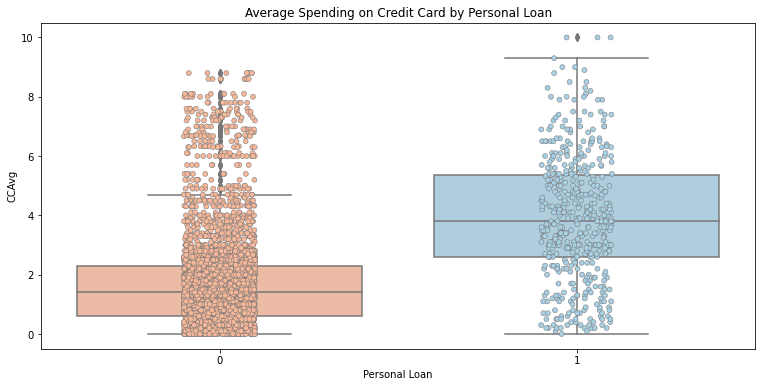

In [22]:
# Average Spending on Credit Card by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'RdBu', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'RdBu', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Average Spending on Credit Card by Personal Loan')

<Figure size 921.6x432 with 0 Axes>

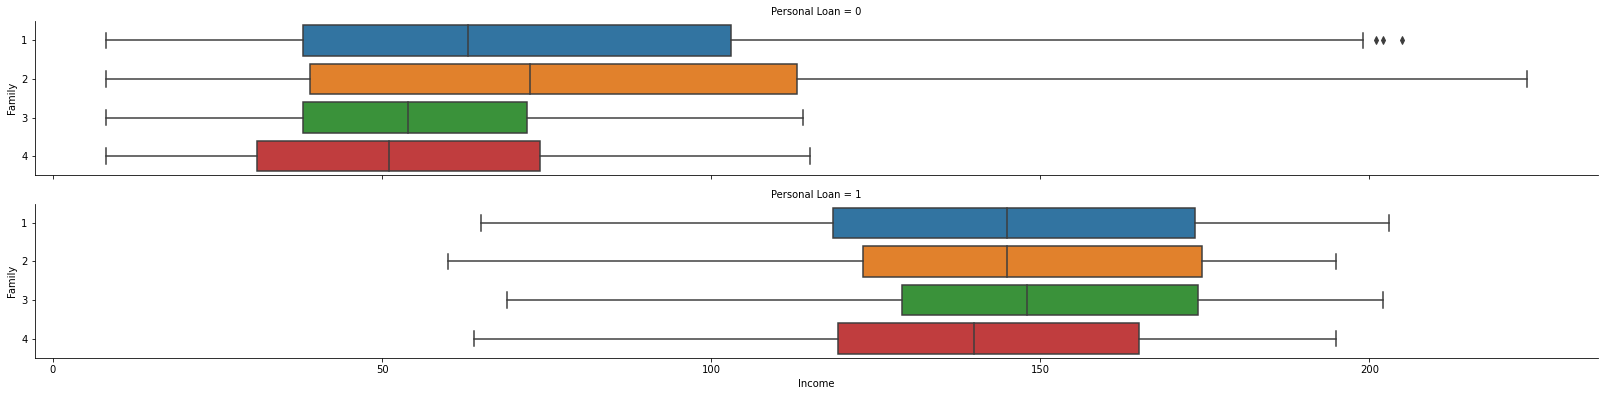

In [23]:
# Family Size by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = bank)

<Figure size 921.6x432 with 0 Axes>

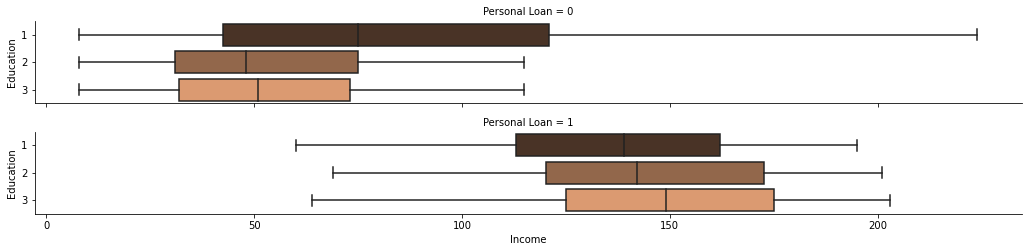

In [24]:
# Education by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = 'copper', data = bank)

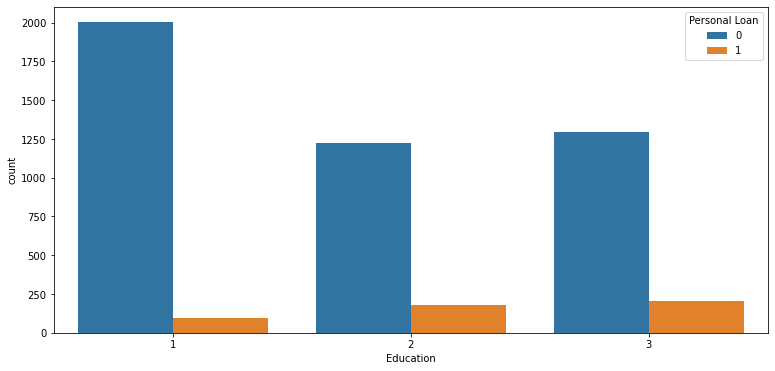

In [25]:
# Education by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'Education', hue ='Personal Loan', data = bank)

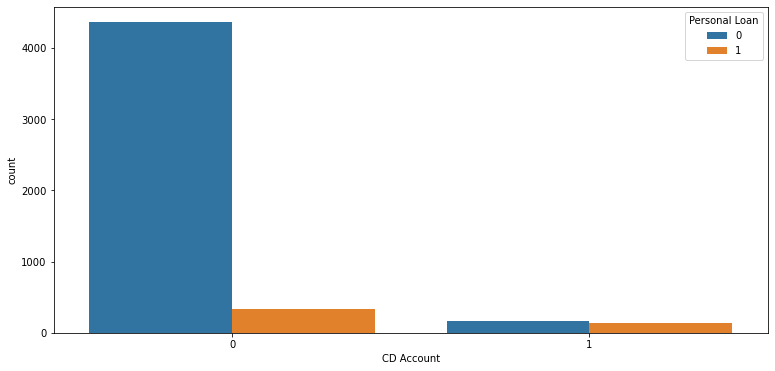

In [26]:
# CD Account by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'CD Account', hue ='Personal Loan', data = bank)

Insight:

Average spending on credit cards by people taking personal loan is higher than those who didn't take personal loan.

People with family size of 2 are the higher income people in the dataset taking loans
    
Higher the income the higher the chances of people taking loan from the bank, in most cases irrespective of their family size 

Customers whose education level is 1 has more income, which means the number of people taking personal loans increases with an increase in education.

As an obersavation, customer who didnt have a CD account didnt take personal loan

In [27]:
bank.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Insight:
drop columns ID and Zip Code in preparation for my modeling prediction

Text(0.5, 1.0, 'Correlation Matrix')

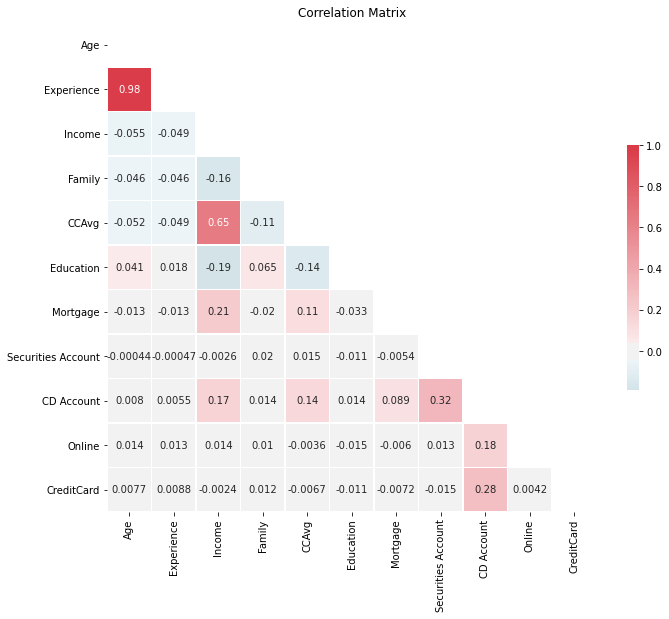

In [28]:
corr = bank.drop('Personal Loan', axis = 1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix')

In [29]:
#Insight for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Experience  Age           0.977182
Age         Experience    0.977182
CCAvg       Income        0.645984
Income      CCAvg         0.645984
dtype: float64

In [30]:
pd.crosstab(bank['Experience'],bank['Personal Loan'],normalize='columns')

Personal Loan,0,1
Experience,,
0.0,0.013053,0.014583
1.0,0.014602,0.016667
2.0,0.016814,0.018750
3.0,0.024779,0.035417
4.0,0.023009,0.018750
5.0,0.029204,0.029167
6.0,0.023673,0.025000
7.0,0.024115,0.025000
8.0,0.022345,0.037500


Insight: People with 8 to 9 years of experience take more loans 

In [31]:
pd.crosstab(bank['Age'],bank['Personal Loan'],normalize='columns')

Personal Loan,0,1
Age,,
23,0.002655,0.000000
24,0.006195,0.000000
25,0.011726,0.000000
26,0.014381,0.027083
27,0.017478,0.025000
28,0.020796,0.018750
29,0.023894,0.031250
30,0.026327,0.035417
31,0.026106,0.014583


Insight: Ages 33 to 36 are likely to take a loan with 8 to 9 years of experience 

Distribution of attributes to target variable  

In [32]:
bank.groupby(bank['Personal Loan']).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.378982,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Insights:

The average income of customers who took loan is more than double of the avg income of customers who didn’t take the loan. 

The average spending on credit cards per month is also more than double for the customer's who took loan.

The average mortgage for customers at 50K is approximately double for customer with a mortgage with 100k or more. 


In [34]:
#Drawing relationship between Personal Loan, Family, Education
bank.groupby(['Personal Loan','Family'])['Education'].value_counts()

Personal Loan  Family  Education
0              1       1            669
                       3            410
                       2            286
               2       1            653
                       3            322
                       2            215
               3       2            339
                       1            309
                       3            229
               4       2            381
                       1            372
                       3            335
1              1       3             58
                       2             40
                       1              9
               2       3             52
                       2             50
                       1              4
               3       3             49
                       2             44
                       1             40
               4       2             48
                       3             46
                       1             40
Name: E

In [35]:
# dropping age column
bank.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
bank.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [36]:
bank.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,1.0,49,4,1.6,1,0,0,1,0
1,19.0,34,3,1.5,1,0,0,1,0
2,15.0,11,1,1.0,1,0,0,0,0
3,9.0,100,1,2.7,2,0,0,0,0
4,8.0,45,4,1.0,2,0,0,0,0


In [37]:
# Separating dependent and independent variables
X = bank.drop(['Personal Loan'], axis = 1)
y = bank['Personal Loan']

display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


(5000, 8)

(5000,)

Split the data into training and test set in the ratio of 70:30 

In [38]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 8)

(1500, 8)

(3500,)

(1500,)

In [39]:
X_train.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
1840,25.0,23,4,0.4,3,88,0,0
2115,31.0,30,3,1.4,1,0,0,0
4437,38.0,63,2,1.5,1,0,0,0
1146,7.0,71,1,0.1,1,78,1,0
2486,36.0,130,1,1.3,1,257,0,0


In [40]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Classification for Logistic model to predict the likelihood of a liability customer buying personal loans

In [41]:
logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=4294967295)

In [42]:
#Predicting the test set results and calculating the accuracy
y_predict = logreg.predict(X_test)

In [43]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Observed Loan Status,Predicted Loan Status
1501,4.0,35,2,0.3,2,0,1,0,0,0
2586,23.0,149,4,6.1,1,0,0,0,1,0
2653,5.0,121,2,3.1,1,408,0,0,0,0
1055,6.0,62,1,1.0,1,0,1,0,0,0
705,36.0,30,3,0.7,2,0,0,0,0,0


In [44]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.90


In [45]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


Confusion matrix analysis 

In [46]:
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[1302   41]
 [ 132   25]]


In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1343
           1       0.38      0.16      0.22       157

    accuracy                           0.88      1500
   macro avg       0.64      0.56      0.58      1500
weighted avg       0.85      0.88      0.86      1500



Insight:

The confusion matrix shows the number of False Negatives as 132, the lower the number of False Negatives, the better our model which is confirm by the recall which is 25%. So, in this case, out of the total number of customers who actually bought personal loans our model is only able to predict 25% of customers accepted the personal loan.

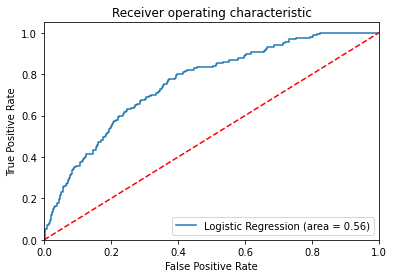

In [48]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Insight:

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.298490
         Iterations 7
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.056     
Dependent Variable:   Personal Loan    AIC:              3000.9001 
Date:                 2021-02-12 12:06 BIC:              3053.0377 
No. Observations:     5000             Log-Likelihood:   -1492.5   
Df Model:             7                LL-Null:          -1581.0   
Df Residuals:         4992             LLR p-value:      7.8209e-35
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience         -0.0701   0.0043 -16.2704 0.0000 -0.0785 -0.0616
Income              0.0101   0.0011   9.1

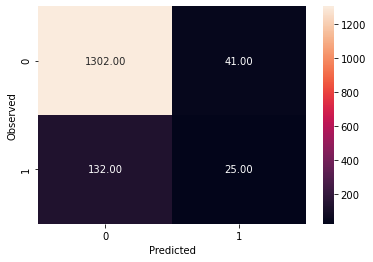

In [50]:
# function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

Insights:

True Positive (observed=1,predicted=1):

Predicted the Personal Loan will be granted and the customer accepted the personal loan

False Positive (observed=0,predicted=1):

Predicted that Personal Loan will be granted and the customer did not accept the personal loan

True Negative (observed=0,predicted=0):

Predicted that Personal Loan will not be granted and the customer did not accept the personal loan

False Negative (observed=1,predicted=0):

Predicted that Personal Loan will not be granted and the customer will accept the personal loan  

In [56]:
print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Training accuracy 0.8951428571428571

Testing accuracy 0.8846666666666667

Confusion Matrix
[[1302   41]
 [ 132   25]]

Recall: 0.1592356687898089

Precision: 0.3787878787878788

F1 Score: 0.2242152466367713

Roc Auc Score: 0.5643535008133705


In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1343
           1       0.38      0.16      0.22       157

    accuracy                           0.88      1500
   macro avg       0.64      0.56      0.58      1500
weighted avg       0.85      0.88      0.86      1500



In [54]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,CD Account,2.54
6,Securities Account,0.79
2,Family,0.58
4,Education,0.42
0,Experience,0.06
3,CCAvg,0.06
1,Income,0.01
5,Mortgage,0.00


Insights:

"CD Account", "Securities Account", "Family", "Education", were the be top 4 features which influence the model's output. Based on the coefficients value.

"Experience", "CCAvg", "Income", and "Mortgage" have coefficients value as 0 so these feature doesn't help model in predicting target variable.
   

Conclusion:

The bank wants to give loan to the people who are eligible for the home loan i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. I think we should have compared other model for best results because ROC curve is the important measure of the model preformance where .80 to .90 are good precentages.  
